In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt 
import seaborn as sns 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multijet-primary-dataset/MultiJetRun2010B.csv


In [2]:
data = '/kaggle/input/multijet-primary-dataset/MultiJetRun2010B.csv'
df = pd.read_csv(data)
df.head()

Run  Lumi      Event       MR       Rsq        E1      Px1        Py1  \
0  148029   388  302318745  215.553  0.031977  136.7100 -109.893  -54.03420   
1  148029   388  302323641  155.437  0.042157   83.3865   81.150    6.88361   
2  148029   388  302336217  400.563  0.026938  253.1840  139.902  102.64000   
3  148029   388  302382289  286.245  0.094192  175.4860 -156.024  -62.95350   
4  148029   388  302403873  204.514  0.018804  833.7950  100.410  -16.65900   

        Pz1        E2       Px2       Py2       Pz2       HT       MET  nJets  \
0  -58.9032  142.1790   70.0254  41.12250 -116.5130  203.666  18.31100      2   
1  -12.9688   73.9025  -72.2472  11.88350    3.0899  154.659  14.77470      2   
2 -101.9350  535.5510 -110.3790 -89.09290 -516.1790  343.280  25.22110      3   
3  -47.7434  112.8510   89.0843   3.45025   67.9007  257.397  46.02880      2   
4 -827.4980  445.6120  -91.1991  15.55830 -390.1440  269.492   8.11345      3   

   nBJets  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21726 entries, 0 to 21725
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     21726 non-null  int64  
 1   Lumi    21726 non-null  int64  
 2   Event   21726 non-null  int64  
 3   MR      21726 non-null  float64
 4   Rsq     21726 non-null  float64
 5   E1      21726 non-null  float64
 6   Px1     21726 non-null  float64
 7   Py1     21726 non-null  float64
 8   Pz1     21726 non-null  float64
 9   E2      21726 non-null  float64
 10  Px2     21726 non-null  float64
 11  Py2     21726 non-null  float64
 12  Pz2     21726 non-null  float64
 13  HT      21726 non-null  float64
 14  MET     21726 non-null  float64
 15  nJets   21726 non-null  int64  
 16  nBJets  21726 non-null  int64  
dtypes: float64(12), int64(5)
memory usage: 2.8 MB


In [6]:
df.isnull().sum()

Run       0
Lumi      0
Event     0
MR        0
Rsq       0
E1        0
Px1       0
Py1       0
Pz1       0
E2        0
Px2       0
Py2       0
Pz2       0
HT        0
MET       0
nJets     0
nBJets    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [4]:
df.describe().T

count          mean           std           min           25%  \
Run     21726.0  1.486660e+05  5.960856e+02  1.479260e+05  1.480290e+05   
Lumi    21726.0  9.006935e+02  4.964827e+02  3.880000e+02  4.630000e+02   
Event   21726.0  8.635646e+08  4.786516e+08  3.023155e+08  4.976106e+08   
MR      21726.0  3.519814e+02  1.936914e+02  2.999990e+01  2.297908e+02   
Rsq     21726.0  2.325329e-02  2.329113e-02  8.863570e-06  7.907200e-03   
E1      21726.0  2.971790e+02  2.240400e+02  4.494760e+01  1.435310e+02   
Px1     21726.0  2.832888e-01  9.170125e+01 -5.438210e+02 -7.847298e+01   
Py1     21726.0  7.642112e-01  9.077012e+01 -6.483850e+02 -7.577000e+01   
Pz1     21726.0 -8.523257e+00  3.413668e+02 -2.022310e+03 -1.513477e+02   
E2      21726.0  2.774101e+02  2.068907e+02  4.204860e+01  1.269163e+02   
Px2     21726.0 -3.993847e-01  7.672013e+01 -7.001120e+02 -6.333325e+01   
Py2     21726.0 -9.099383e-01  7.575849e+01 -4.598010e+02 -6.270645e+01   
Pz2     21726.0 -1.915512e+00  3.214151e+02 -1.647600e+03 -1.542318e+02   
HT      21726.0  2.423283e+02  7.884153e+01  1.209380e+02  1.932520e+02   
MET     21726.0  1.600537e+01  1.079788e+01  1.004450e-01  8.626845e+00   
nJets   21726.0  2.435791e+00  6.557501e-01  2.000000e+00  2.000000e+00   
nBJets  21726.0  5.366842e-02  2.363340e-01  0.000000e+00  0.000000e+00   

                 50%           75%           max  
Run     1.491810e+05  1.491810e+05  1.491810e+05  
Lumi    9.860000e+02  9.990000e+02  1.804000e+03  
Event   9.709389e+08  9.844834e+08  1.703645e+09  
MR      2.929110e+02  4.068830e+02  2.433820e+03  
Rsq     1.681655e-02  3.161232e-02  7.636950e-01  
E1      2.120605e+02  3.745428e+02  2.101580e+03  
Px1    -3.105090e-01  7.856248e+01  7.222910e+02  
Py1     1.238670e+00  7.773807e+01  4.702340e+02  
Pz1    -5.478110e+00  1.353452e+02  2.061890e+03  
E2      2.041400e+02  3.667105e+02  1.843360e+03  
Px2    -5.482085e-01  6.285202e+01  4.053260e+02  
Py2    -1.900460e+00  6.111155e+01  6.357340e+02  
Pz2    -1.803295e+00  1.511678e+02  1.830370e+03  
HT      2.236960e+02  2.692415e+02  1.462630e+03  
MET     1.403500e+01  2.109105e+01  4.231440e+02  
nJets   2.000000e+00  3.000000e+00  7.000000e+00  
nBJets  0.000000e+00  0.000000e+00  2.000000e+00

In [ ]:
df.columns

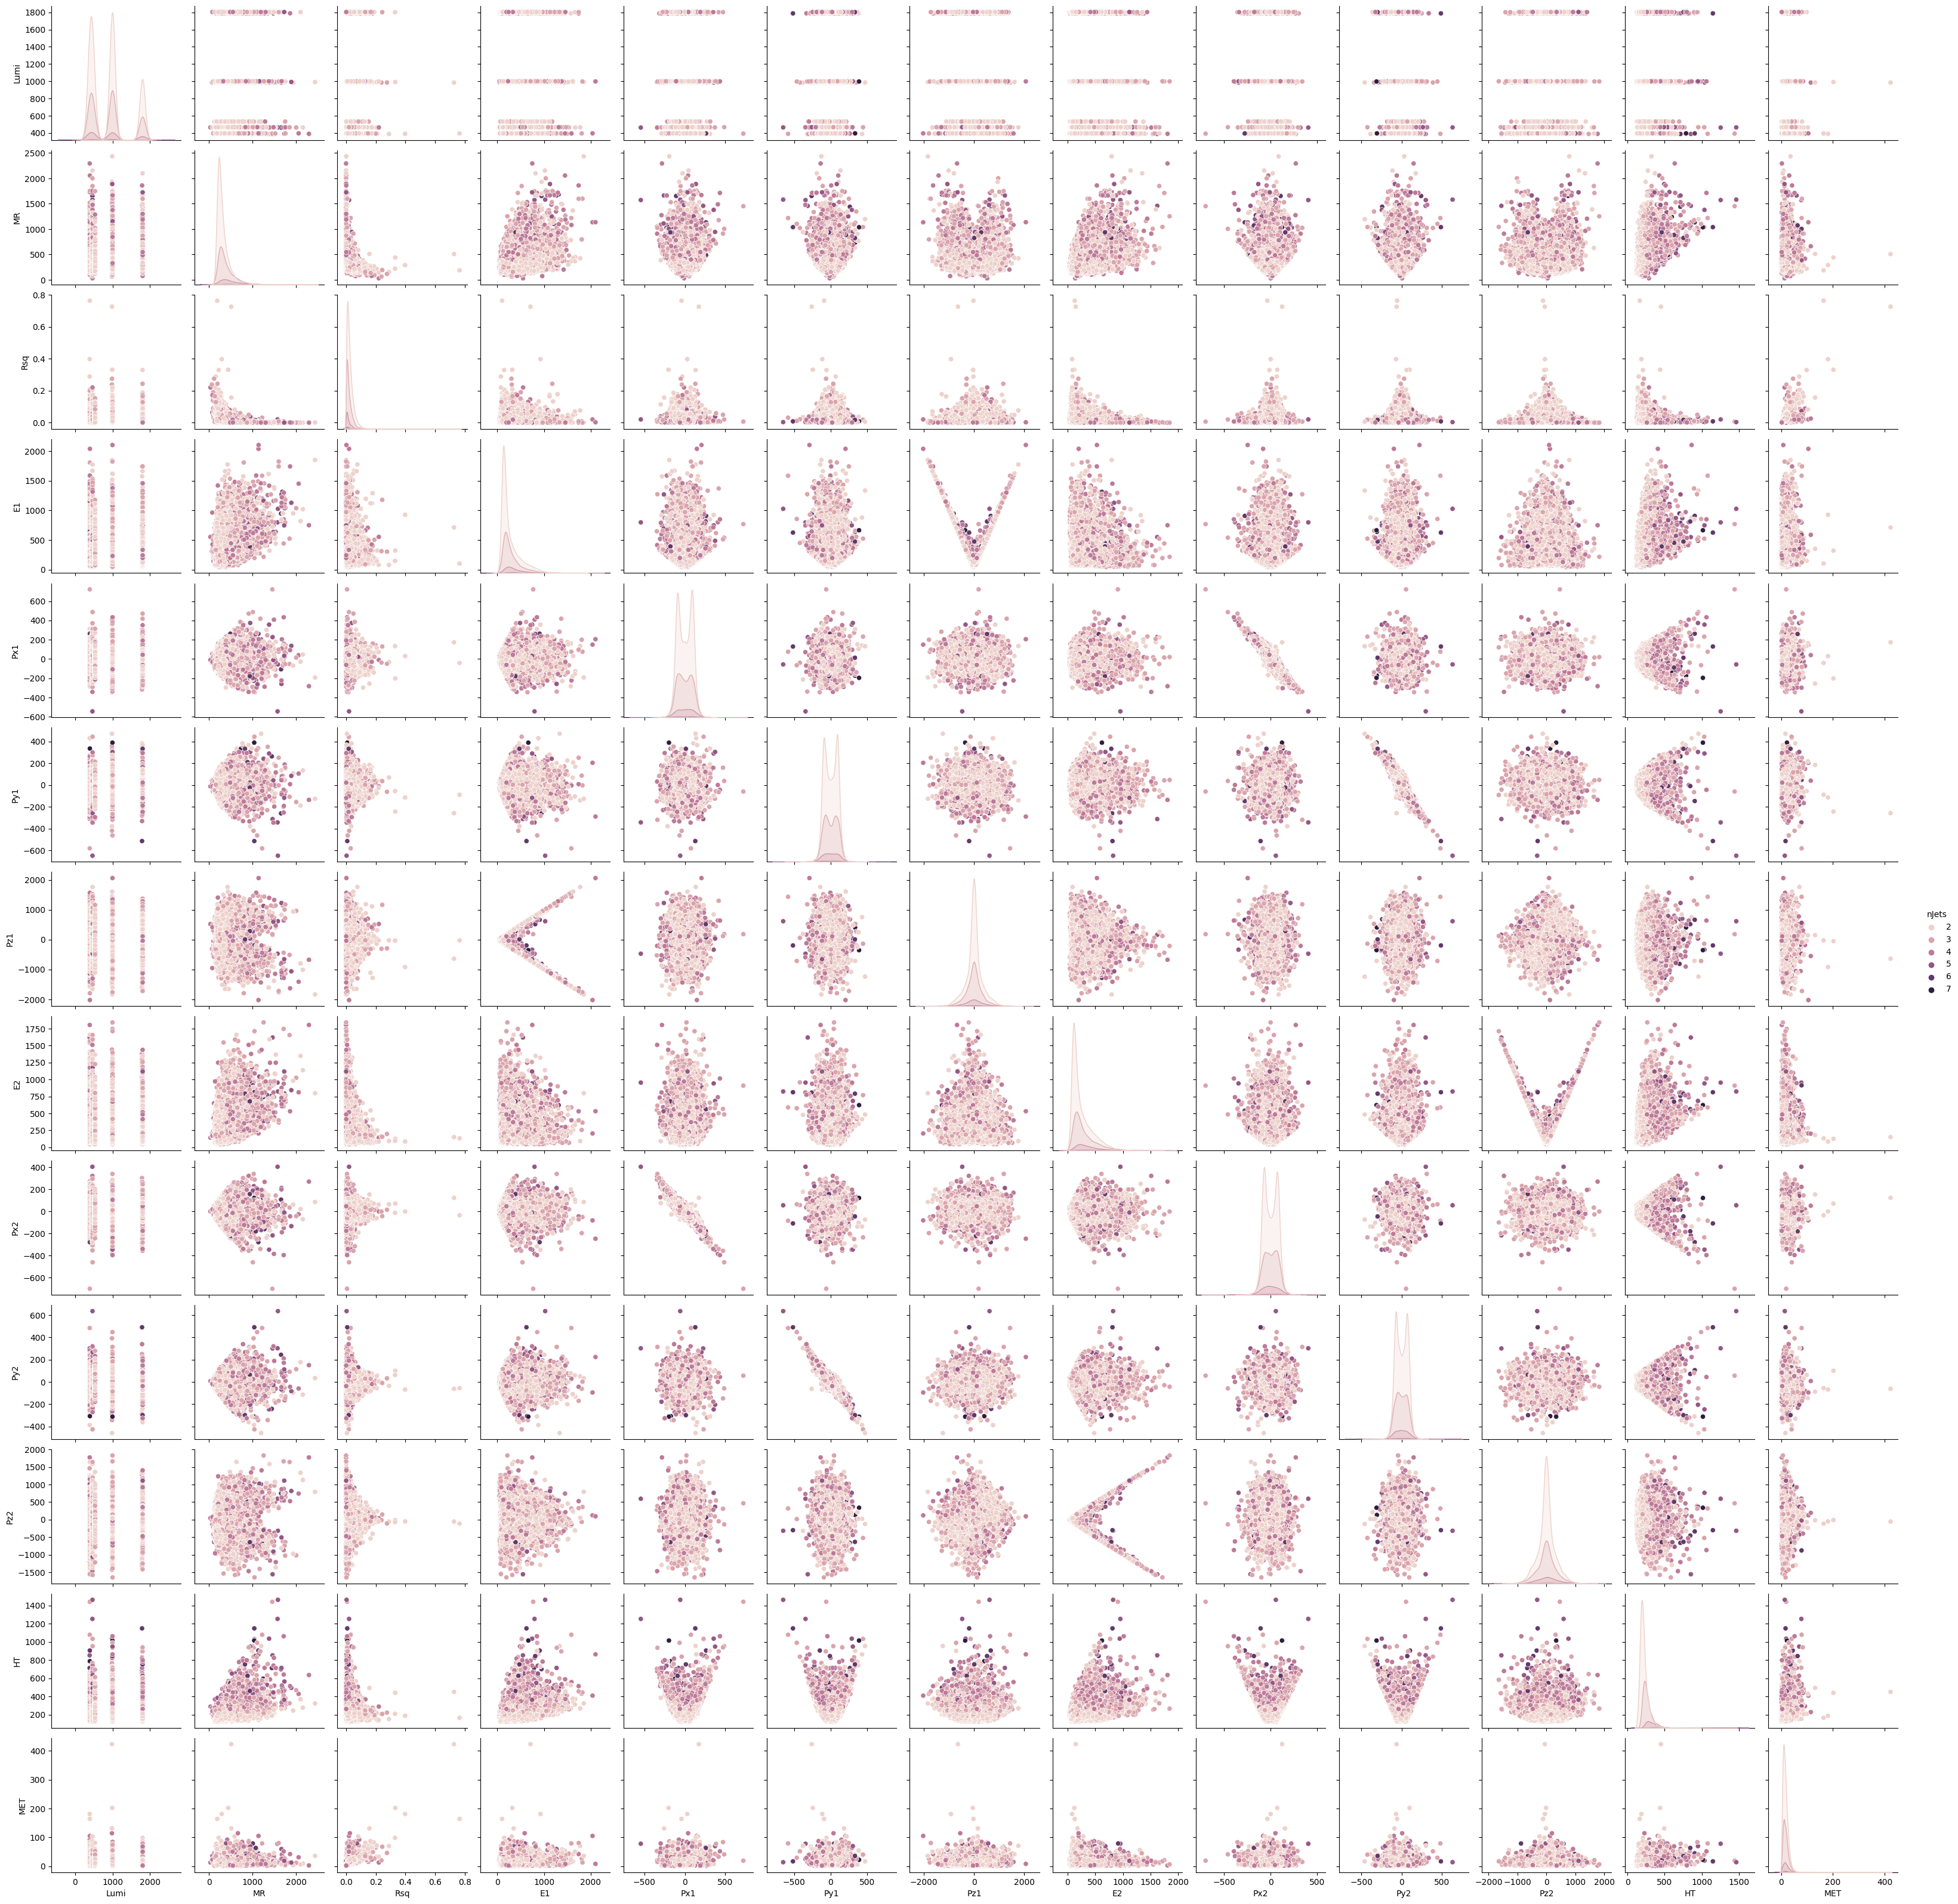

In [11]:
df_relevant = df.drop(['Run', 'Event', 'nBJets'], axis=1)

sns.pairplot(df_relevant, hue='nJets')

In [15]:
corr= df_relevant.corr()

<Axes: >

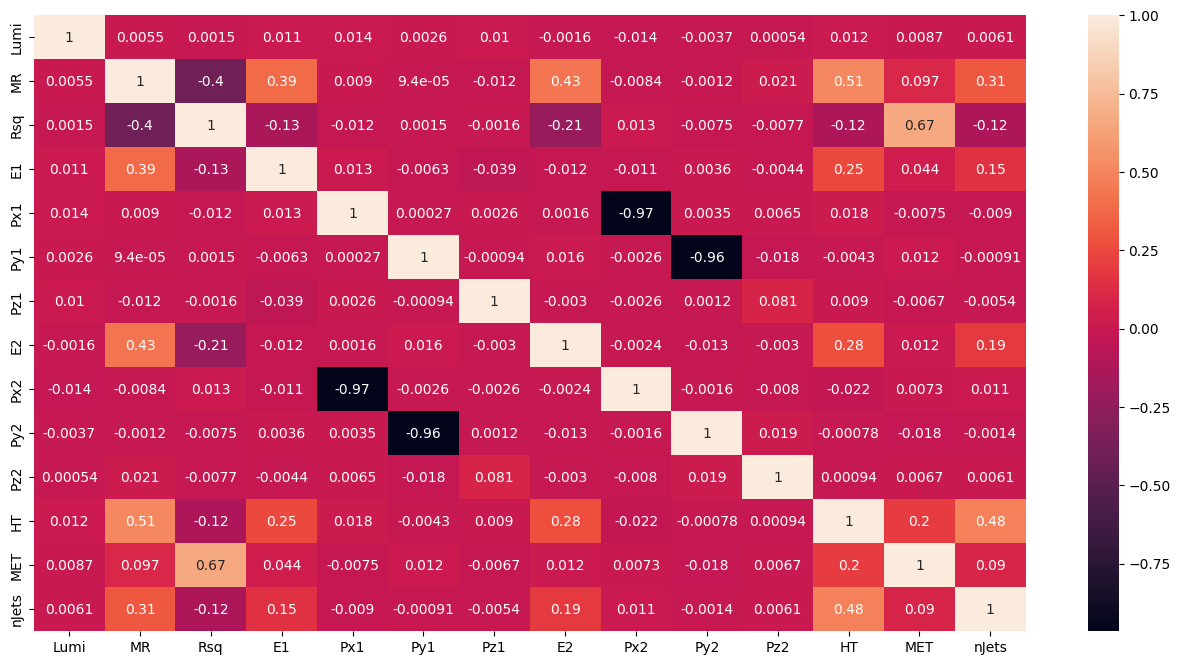

In [16]:
fig = plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True)